In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Task 1 : Importing The Data set :

In [21]:
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
df = pd.read_csv(url_data , names = names)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Task 2 : Prepocessing And Split The Data :

In [28]:
X = df.iloc[: , :-1].values
y = df.iloc[: , 4].values

In [40]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
class_fier = KNeighborsClassifier(n_neighbors=5)
class_fier.fit(X_train , y_train)

KNeighborsClassifier()

In [35]:
y_predict = class_fier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report , confusion_matrix , f1_score
print(confusion_matrix(y_test , y_predict))
print(classification_report(y_test , y_predict))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Text(0, 0.5, 'Mean Values')

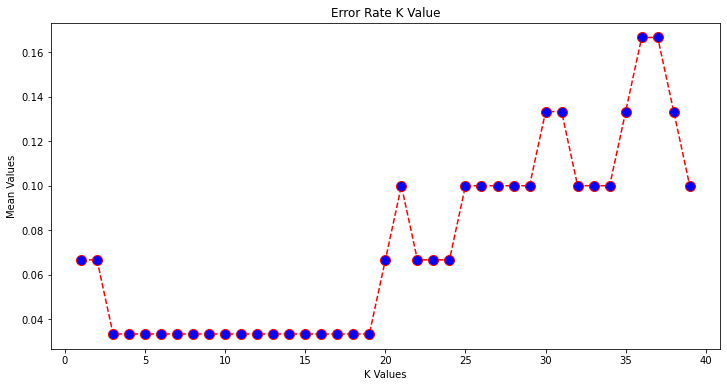

In [45]:
# Plot The Error Rate :
error = []
# Calculating The Value Of K Between the Range Of 1 to 40 : 
for i in range(1 , 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train , y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
# Plot The Model :
plt.figure(figsize = (12 , 6))
plt.plot(range(1, 40) , error , color = "red" , linestyle = "dashed" , marker = "o" , markerfacecolor = "blue" , markersize = 10)
plt.title("Error Rate K Value")
plt.xlabel("K Values")
plt.ylabel("Mean Values")